C:\Users\aksel\AppData\Local\Temp\ipykernel_29264\2564296859.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.84
Precision: 0.86
Recall: 0.91
F1 Score: 0.88
Confusion Matrix:
[[315 126]
 [ 83 804]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.71      0.75       441
    Graduate       0.86      0.91      0.88       887

    accuracy                           0.84      1328
   macro avg       0.83      0.81      0.82      1328
weighted avg       0.84      0.84      0.84      1328



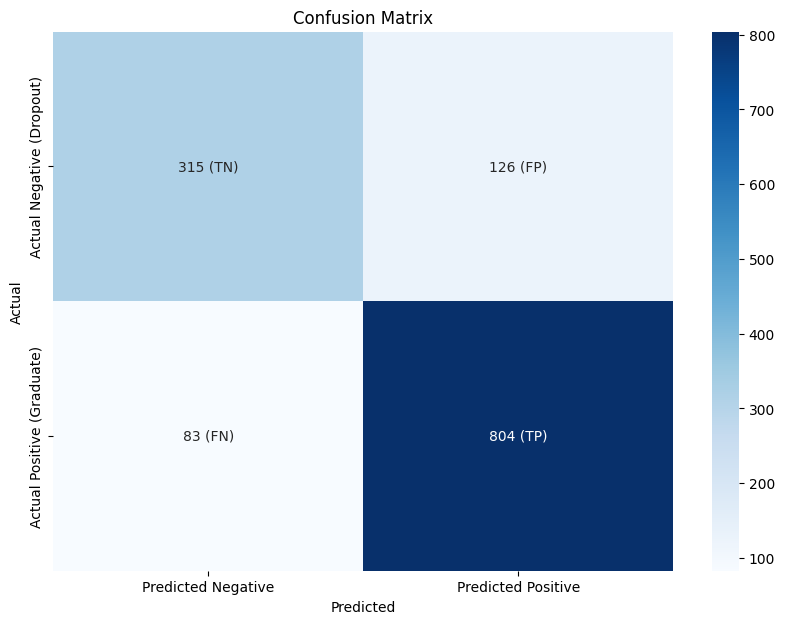

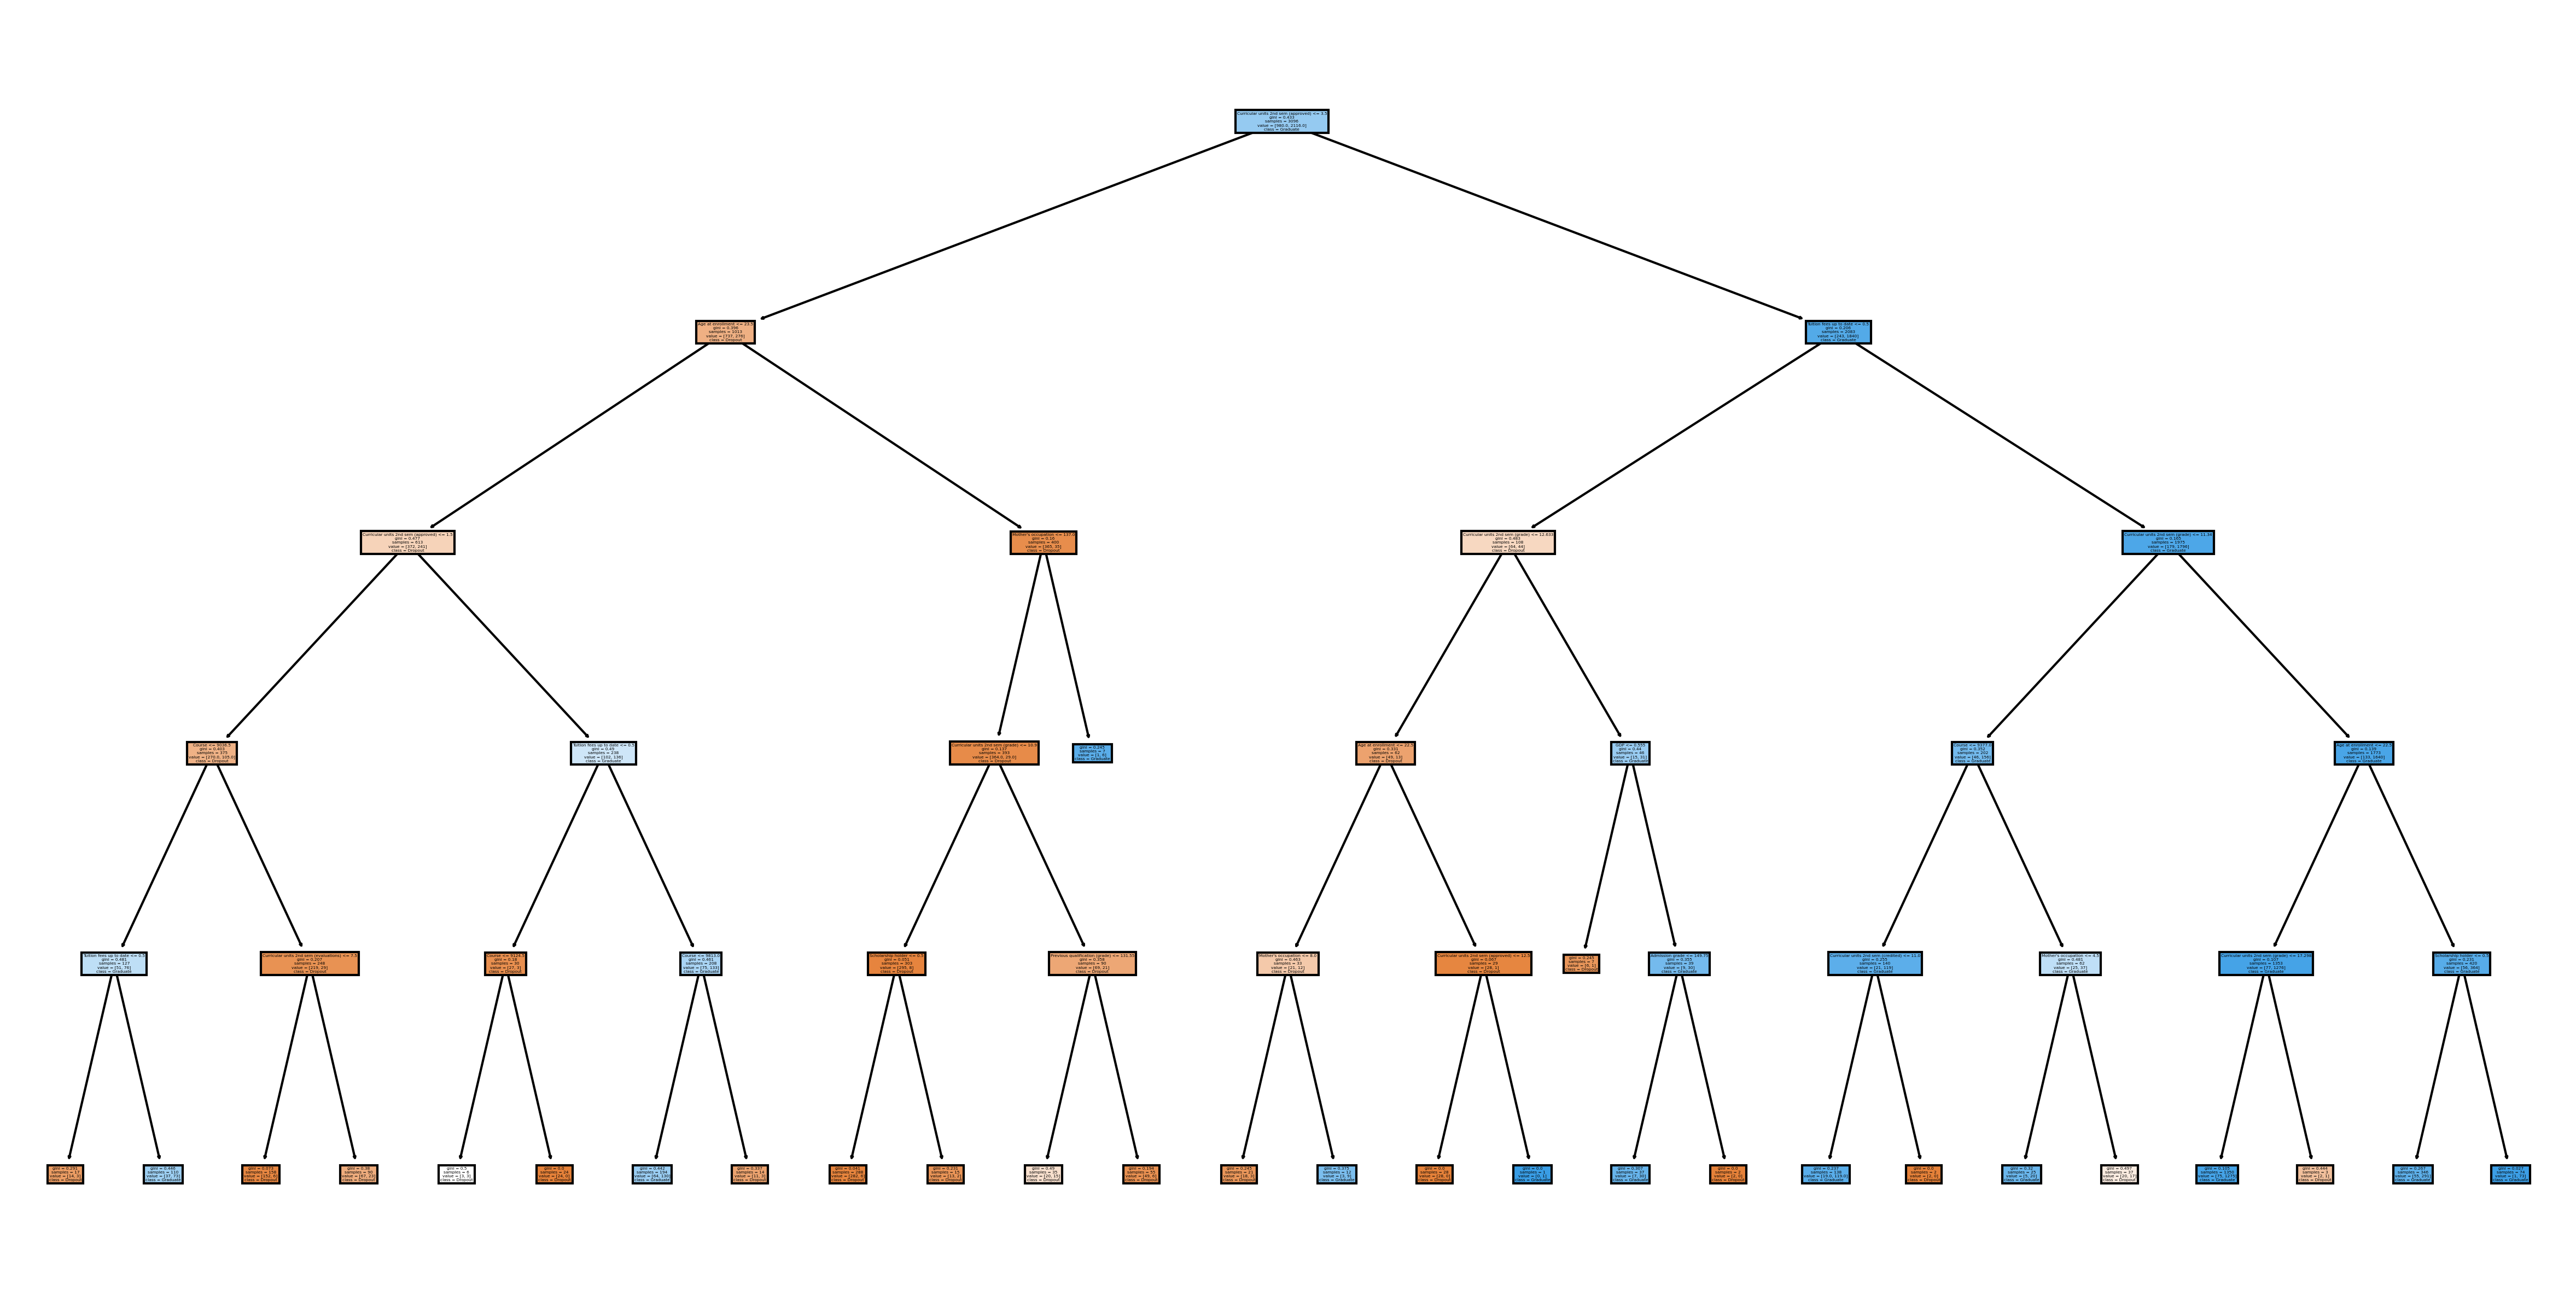

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'file_path' with your actual file location)
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features]
y = data[target]

# Encode target (assuming "Graduate" = 1 and "Dropout" = 0)
y = y.map({'Graduate': 1, 'Dropout': 0})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # Fill NaN values in target with the most frequent value

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# Visualize the confusion matrix with corrected labels
labels = [
    [f'{conf_matrix[0, 0]} (TN)', f'{conf_matrix[0, 1]} (FP)'],
    [f'{conf_matrix[1, 0]} (FN)', f'{conf_matrix[1, 1]} (TP)']
]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative (Dropout)', 'Actual Positive (Graduate)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20,10), dpi=300)  # Increase DPI for better quality
plot_tree(best_clf, feature_names=features, class_names=['Dropout', 'Graduate'], filled=True)
plt.show()

# Decision Tree Model for Student Outcomes

## Introduction

In this project, we aim to predict student outcomes using a decision tree model. The target variable has three classes: `Graduate`, `Dropout`, and `Enrolled`. We will use various features related to student demographics, academic performance, and other relevant factors to build and optimize our model.

## Data Preprocessing

### Loading the Dataset

We start by loading the dataset using `pandas`. The dataset contains various features related to student information.

### Selecting Features and Target

We select relevant features and the target variable for our model. The target variable has three classes: `Graduate`, `Dropout`, and `Enrolled`.

### Encoding the Target Variable

We encode the target variable to handle three classes: `Graduate` = 1, `Dropout` = 0, and `Enrolled` = 2.

### Handling Missing Values

We handle missing values by filling them with the mean for numerical features and the mode for the target variable.

### Splitting the Data

We split the data into training and testing sets using an 80-20 split.

## Model Building and Hyperparameter Tuning

### Hyperparameter Tuning with GridSearchCV

We use `GridSearchCV` to perform hyperparameter tuning for the decision tree model. This involves searching over a specified parameter grid and using cross-validation to evaluate the performance of each combination of parameters.

### Best Model

We retrieve the best model found by `GridSearchCV` and use it to make predictions on the test set.

## Model Evaluation

### Evaluation Metrics

We evaluate the model using various metrics such as accuracy, precision, recall, and F1 score. These metrics provide a comprehensive evaluation of the model's performance.

### Confusion Matrix

We visualize the confusion matrix to understand the distribution of correct and incorrect predictions.

### Decision Tree Visualization

We visualize the decision tree to understand the decision rules used by the model.

## Conclusion

In this project, we built and optimized a decision tree model to predict student outcomes. We used various features related to student demographics, academic performance, and other relevant factors. By performing hyperparameter tuning and evaluating the model using multiple metrics, we achieved an accuracy of 76%. Further improvements can be made by exploring additional features, using different models, and applying advanced techniques such as ensemble methods.


C:\Users\aksel\AppData\Local\Temp\ipykernel_29264\2080398219.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.74
Confusion Matrix:
[[338  75  28]
 [ 15 610  17]
 [ 65 116  64]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       441
    Graduate       0.76      0.95      0.85       642
    Enrolled       0.59      0.26      0.36       245

    accuracy                           0.76      1328
   macro avg       0.72      0.66      0.66      1328
weighted avg       0.75      0.76      0.74      1328



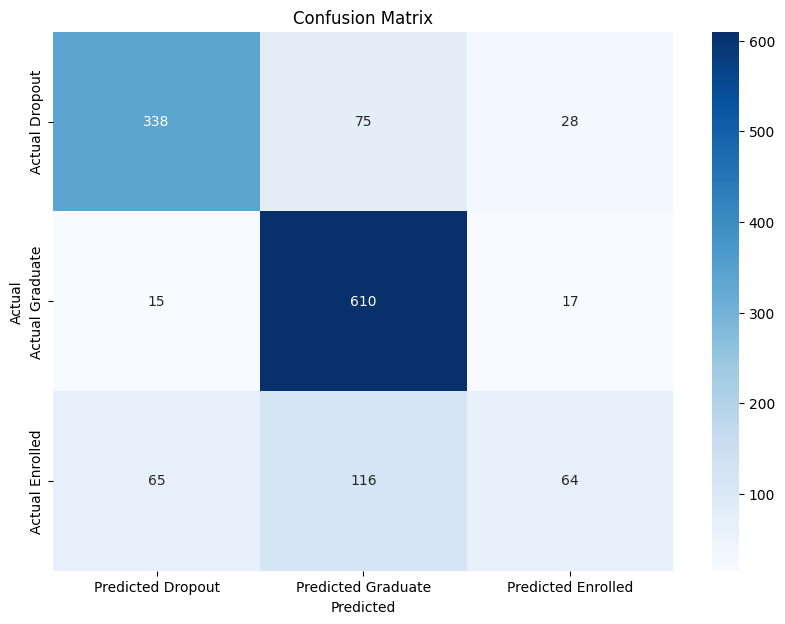

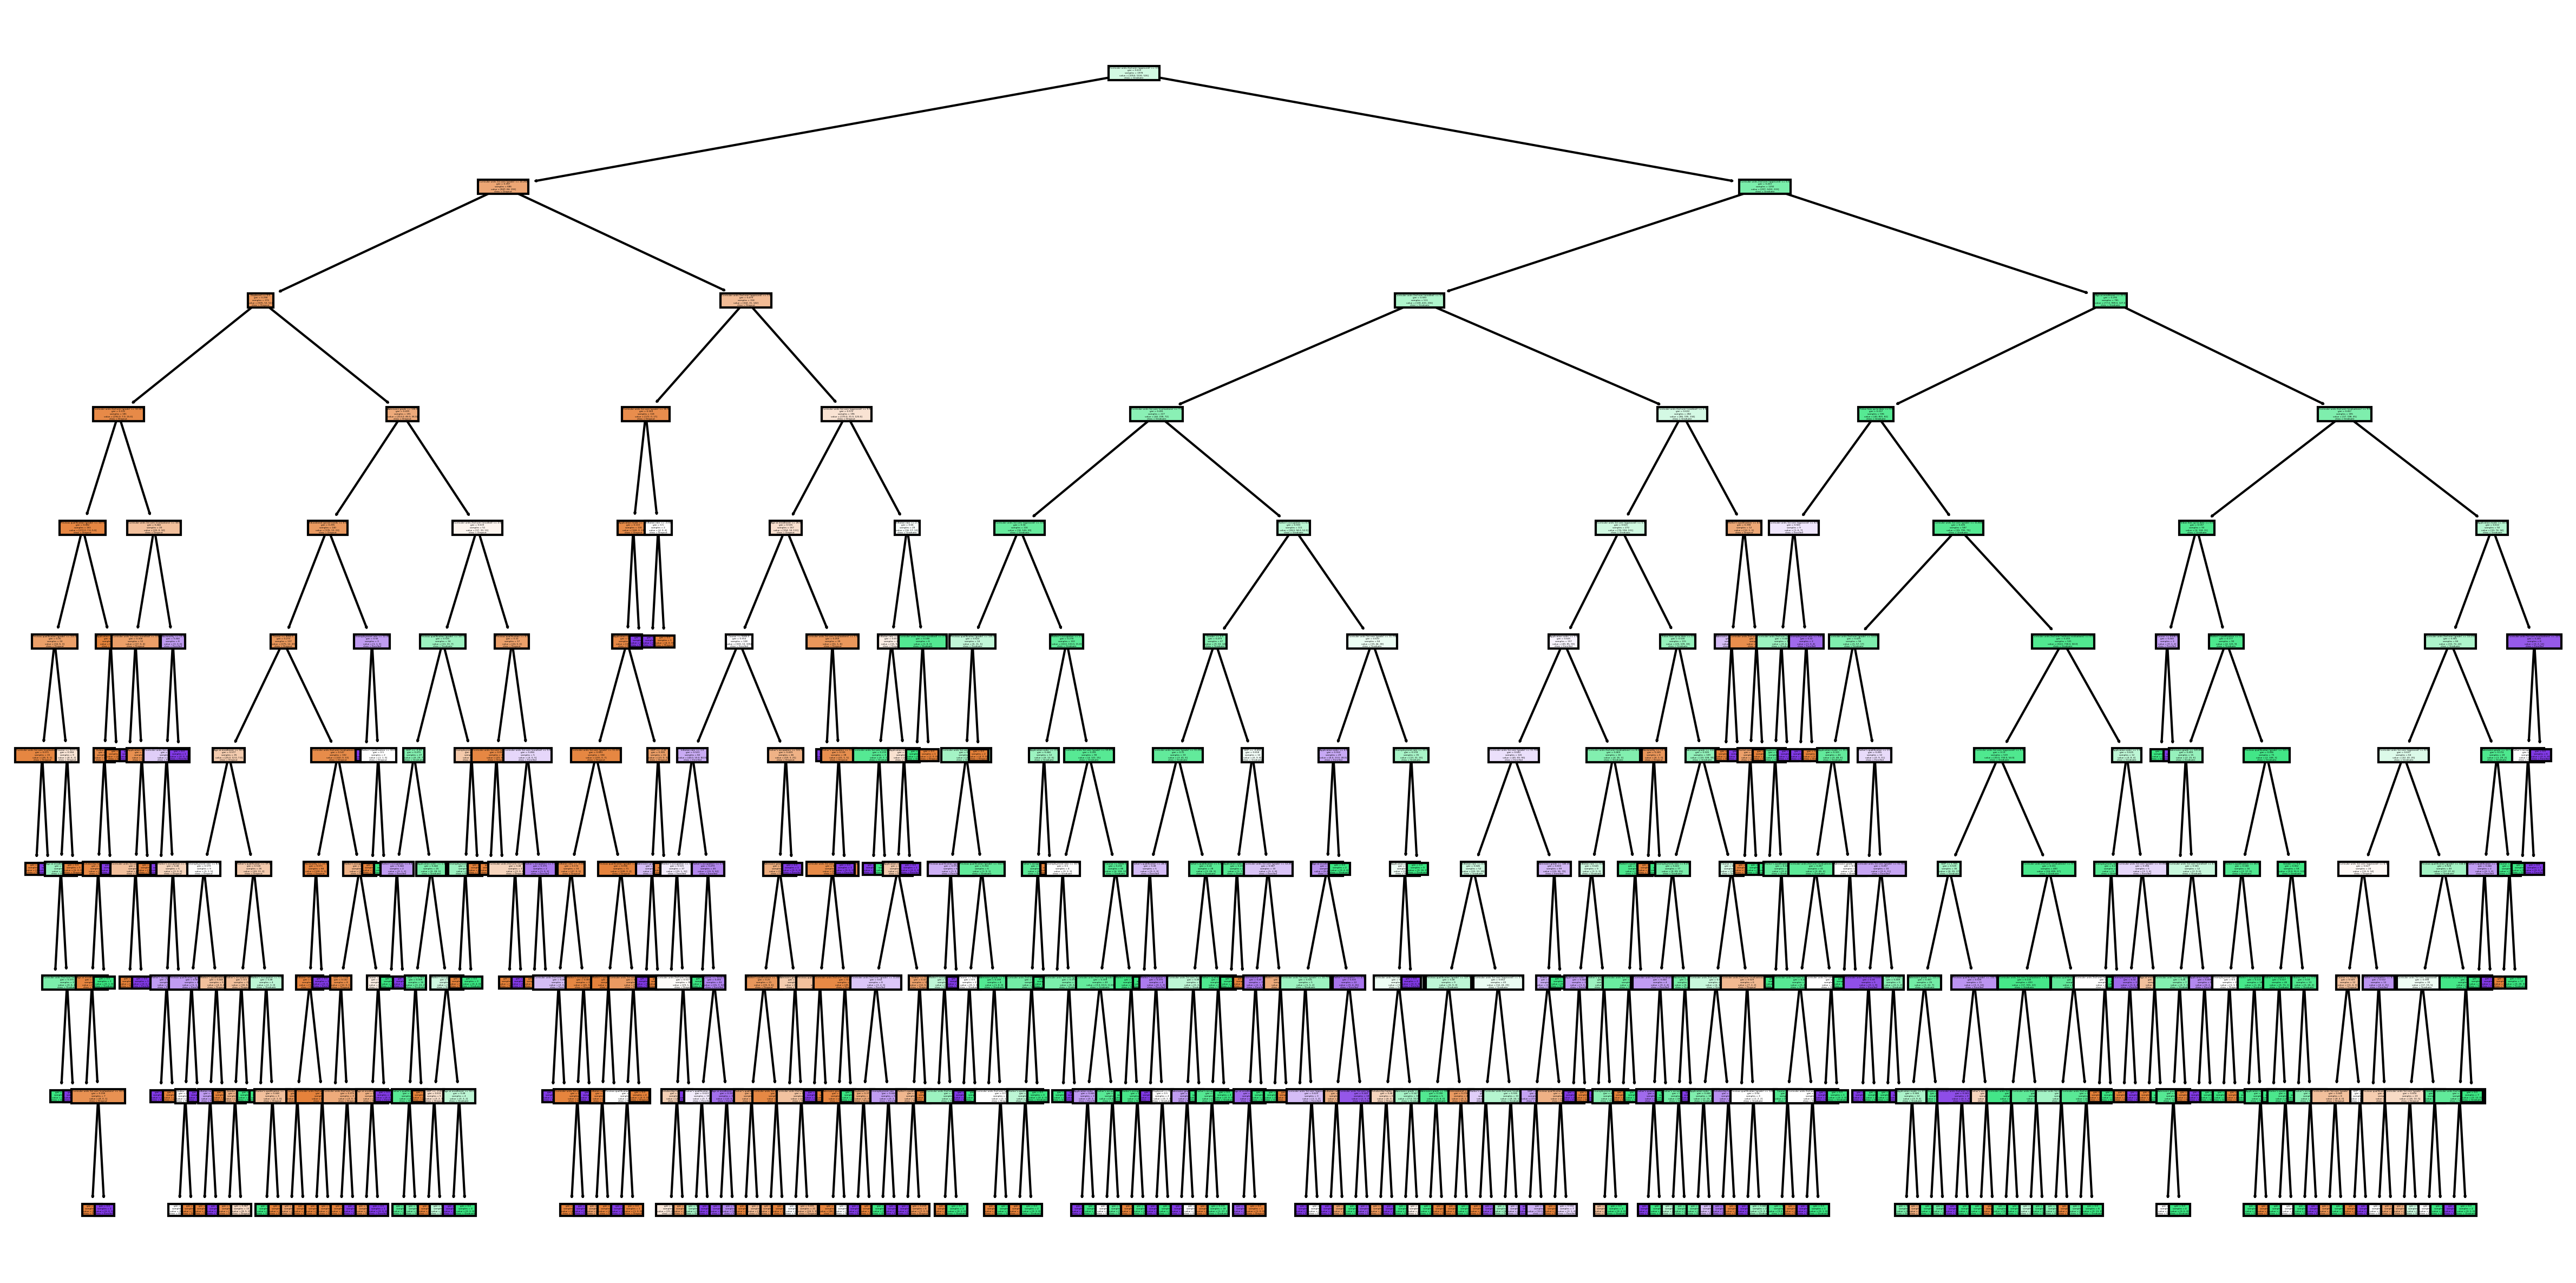

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'file_path' with your actual file location)
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features]
y = data[target]

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # Fill NaN values in target with the most frequent value

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV with RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix with corrected labels
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20,10), dpi=300)  # Increase DPI for better quality
plot_tree(best_clf.estimators_[0], feature_names=X.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True)
plt.show()

# Decision Tree with AdaBoost
### Model Evaluation and Visualization
This section of the code evaluates the performance of the trained AdaBoost model, visualizes the results, and saves the model for future use.

### Model Performance Metrics:

The model's performance is evaluated using various metrics such as accuracy, precision, recall, and F1 score.
The confusion matrix is printed to show the number of correct and incorrect predictions for each class.
A detailed classification report is generated to provide precision, recall, and F1 score for each class.
### Confusion Matrix Visualization:

The confusion matrix is visualized using a heatmap to better understand the model's performance across different classes.
The heatmap shows the actual vs. predicted values, making it easier to identify where the model is performing well and where it is making errors.
### Feature Importance:

The importance of each feature is analyzed and visualized.
A bar plot is created to show the relative importance of each feature, helping to understand which features contribute most to the model's predictions.
### Model Persistence:

The trained AdaBoost model is saved using joblib for future use.
Saving the model allows it to be loaded and used later without retraining, which is useful for deployment or further analysis.

c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aksel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

Cross-validation scores: [0.73064516 0.78029079 0.77059774 0.7641357  0.76575121]
Mean cross-validation score: 0.7622841211110531
Accuracy (Train): 0.77
Accuracy (Test): 0.74
Precision: 0.72
Recall: 0.74
F1 Score: 0.72
Confusion Matrix:
[[342  74  25]
 [ 31 583  28]
 [ 74 110  61]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.78      0.77       441
    Graduate       0.76      0.91      0.83       642
    Enrolled       0.54      0.25      0.34       245

    accuracy                           0.74      1328
   macro avg       0.69      0.64      0.65      1328
weighted avg       0.72      0.74      0.72      1328



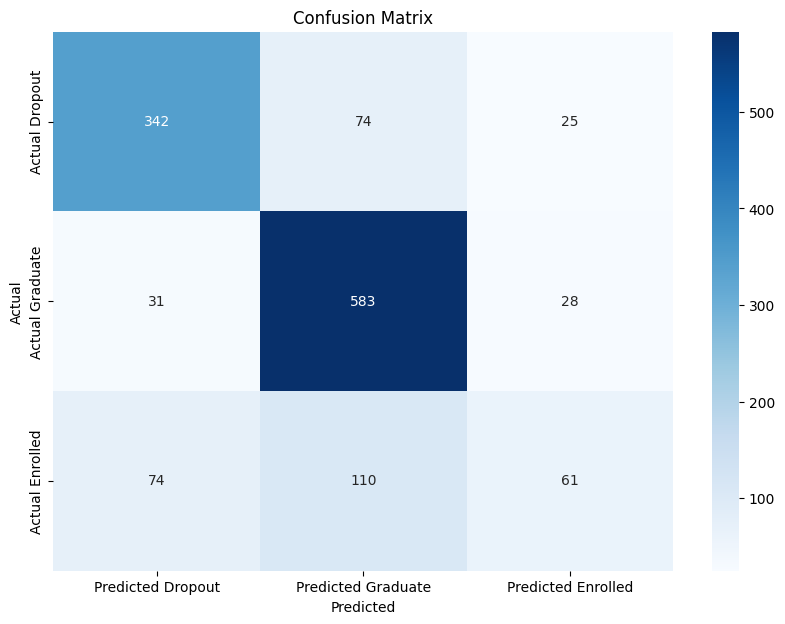

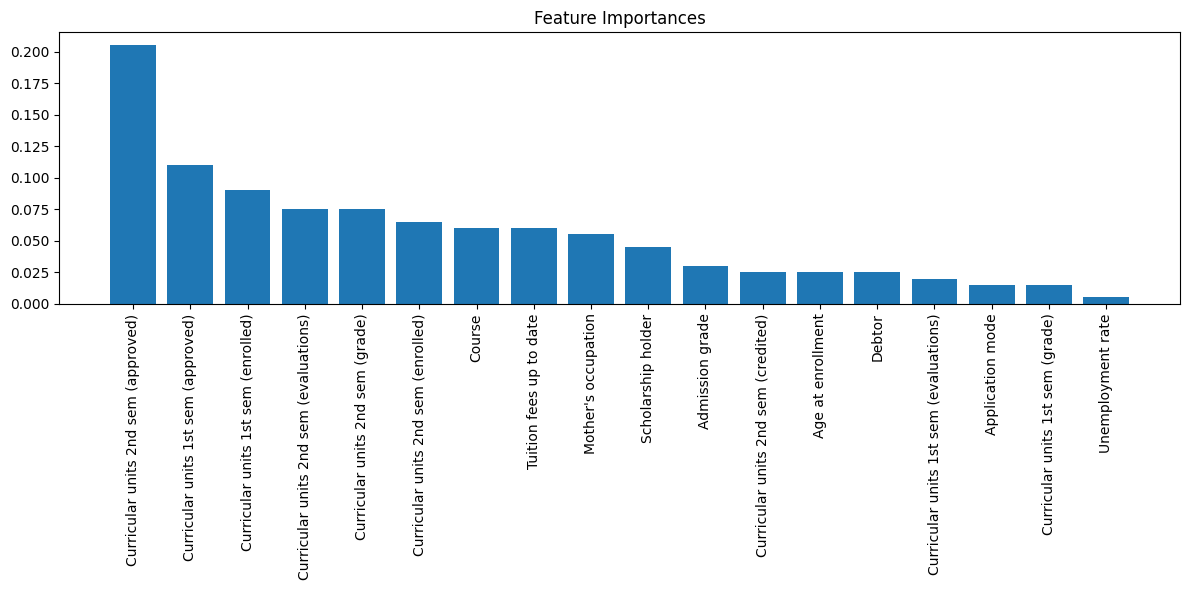


Updated features list:
['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = features = ['Application mode', 'Course', "Mother's occupation", 'Admission grade',
            'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
            'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
            'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
            'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
            'Curricular units 2nd sem (grade)', 'Unemployment rate']
target = 'Target'

# Preprocess the data
X = data[features].copy()
y = data[target].copy()

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the AdaBoost model with best parameters
ada_clf = AdaBoostClassifier(estimator=base_estimator, **best_params, random_state=42)
ada_clf.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Make predictions
y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy (Train): {accuracy_train:.2f}')
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred_test, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = ada_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(ada_clf, 'ada_boost_model.pkl')

# Identify the lowest importance features (e.g., bottom 5 features)
num_lowest_features = 12
lowest_features = [features[i] for i in indices[-num_lowest_features:]]

# Remove the lowest importance features from the list
updated_features = [feature for feature in features if feature not in lowest_features]

print("\nUpdated features list:")
print(updated_features)

# Decision Tree with Bagging
This section of the code demonstrates how to preprocess data and train a Bagging classifier using decision trees as base estimators.

### Load and Preprocess Data:

The dataset is loaded, and relevant features and target are selected.
The target variable is encoded, mapping 'Graduate' to 1, 'Dropout' to 0, and 'Enrolled' to 2.
Missing values in the features are filled with the mean of each column.
The dataset is split into training and testing sets with a 70-30 split.

### Define the Base Estimator:

A decision tree classifier is defined as the base estimator.
### Define the Bagging Classifier:

A Bagging classifier is defined using the decision tree as the base estimator.

### Define the Bagging Classifier:

A Bagging classifier is defined using the decision tree as the base estimator.
### Hyperparameter Tuning:

GridSearchCV is used to find the best hyperparameters for the Bagging classifier.
The parameter grid includes the number of estimators, maximum depth, minimum samples split, and minimum samples leaf.
### Train the Bagging Model:

The Bagging model is trained using the best parameters obtained from GridSearchCV.
### Cross-Validation:

Cross-validation is performed to ensure the model's robustness.
### Model Evaluation:

Predictions are made on both the training and testing sets.
The model's performance is evaluated using accuracy, precision, recall, F1 score, and confusion matrix.
A detailed classification report is generated to provide precision, recall, and F1 score for each class.

### Visualization:

The confusion matrix is visualized using a heatmap to better understand the model's performance across different classes.
Feature importances are analyzed and visualized using a bar plot to show the relative importance of each feature.
### Model Persistence:

The trained Bagging model is saved using joblib for future use.
### Feature Selection:

The lowest importance features are identified and removed from the feature list.
The updated feature list is printed be to easily used if wanted.

Best Parameters: {'estimator__max_depth': 15, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.74677419 0.79159935 0.77221325 0.76736672 0.78029079]
Mean cross-validation score: 0.7716488613268018
Accuracy (Train): 0.92
Accuracy (Test): 0.76
Precision: 0.74
Recall: 0.76
F1 Score: 0.74
Confusion Matrix:
[[333  64  44]
 [ 17 593  32]
 [ 57 105  83]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.76      0.79       441
    Graduate       0.78      0.92      0.84       642
    Enrolled       0.52      0.34      0.41       245

    accuracy                           0.76      1328
   macro avg       0.71      0.67      0.68      1328
weighted avg       0.74      0.76      0.74      1328



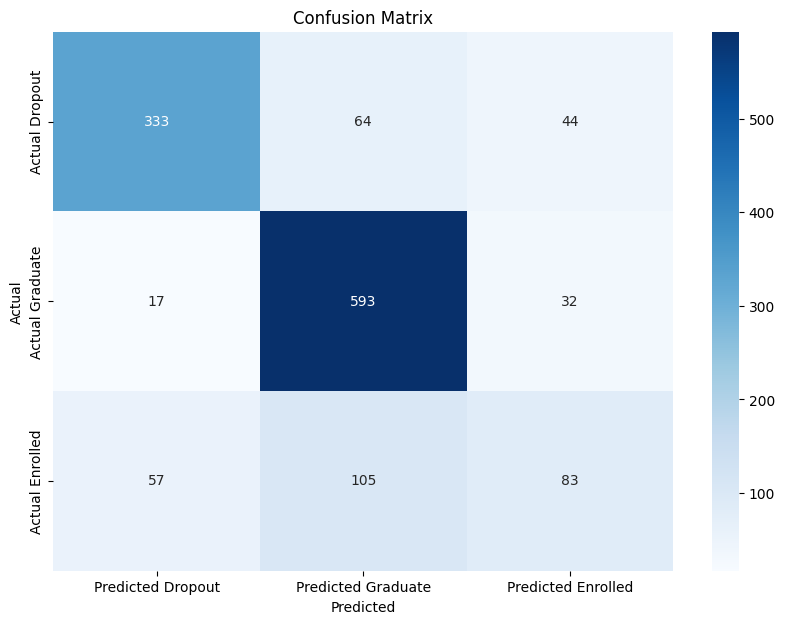

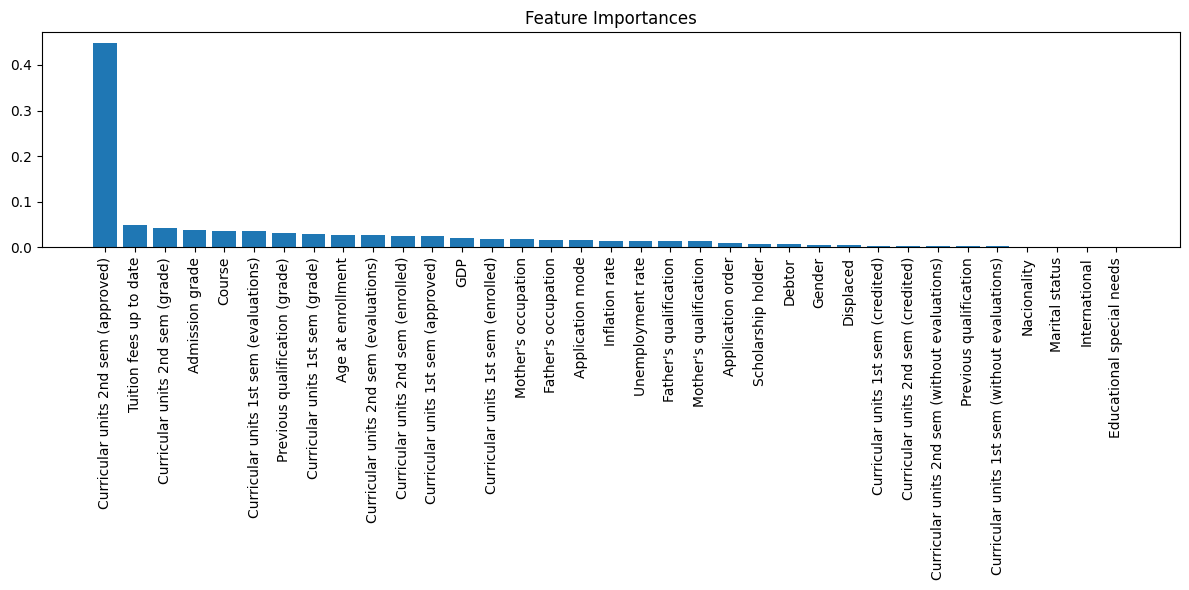


Updated features list:
['Application mode', 'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features].copy()
y = data[target].copy()

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the Bagging classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 100],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the Bagging model with best parameters
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=best_params['estimator__max_depth'],
        min_samples_split=best_params['estimator__min_samples_split'],
        min_samples_leaf=best_params['estimator__min_samples_leaf'],
        random_state=42
    ),
    n_estimators=best_params['n_estimators'],
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Make predictions
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy (Train): {accuracy_train:.2f}')
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred_test, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_clf.estimators_], axis=0)
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(bagging_clf, 'bagging_model.pkl')

# Code to use if we want to remove the lowest importance features from the list, e.g. the 5 lowest importance features
num_lowest_features = 5
lowest_features = [features[i] for i in indices[-num_lowest_features:]]
updated_features = [feature for feature in features if feature not in lowest_features]

print("\nUpdated features list:")
print(updated_features)